# Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bootstrap import bootstrap

In [2]:
# data set
df = pd.read_csv("assets/cars.csv")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [3]:
# pick dependent and independent variables
x = pd.DataFrame(df['speed'])
y = df['dist']

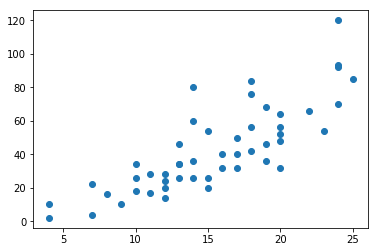

In [4]:
# scatter plot
plt.scatter(x, y)
plt.show()

> Not quite linear!

## Simple Linear Regression

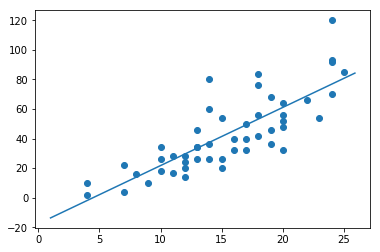

Model slope:     3.93240875912
Model intercept: -17.5790948905
R^2 score: 0.65
Confidence interval: (-0.21, 0.88)


In [5]:
# pick model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# plot the model together with the data
xfit = pd.DataFrame(np.arange(1., 26.,.1))
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

# print out model properties
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
print("R^2 score: {:.2f}".format(model.score(x,y)))
lb, ub = bootstrap(model, df, 'dist')
print("Confidence interval: ({0:.2f}, {1:.2f})".format(lb,ub))

## Non-linear Tree Regression

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# setting up grid search
model = DecisionTreeRegressor()
param_grid = {'max_depth': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(x,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))
print("R^2 score: {:.2f}".format(grid.best_estimator_.score(x,y)))
lb, ub = bootstrap(grid.best_estimator_, df, 'dist')
print("Confidence interval: ({0:.2f}, {1:.2f})".format(lb,ub))

Best parameters: {'max_depth': 3}
R^2 score: 0.76
Confidence interval: (-0.18, 0.93)


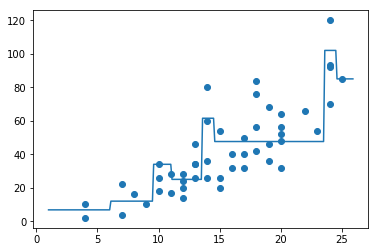

In [7]:
# plot the model together with the data
xfit = pd.DataFrame(np.arange(1., 26.,.1))
yfit = grid.best_estimator_.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [8]:
from treeviz import tree_print

tree_print(grid.best_estimator_,x)

if speed =< 13.5: 
  |then if speed =< 9.5: 
  |  |then if speed =< 6.0: 
  |  |  |then 6.8
  |  |  |else 12.0
  |  |else if speed =< 11.0: 
  |  |  |then 34.0
  |  |  |else 25.0
  |else if speed =< 23.5: 
  |  |then if speed =< 14.5: 
  |  |  |then 61.5
  |  |  |else 47.6
  |  |else if speed =< 24.5: 
  |  |  |then 102.0
  |  |  |else 85.0
<------->
Tree Depth:  3


### Manipulating the Model Complexity

Choose a number tree depth: 1
R^2 score: 0.47


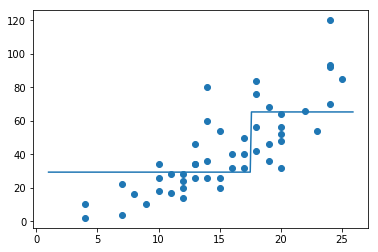

In [9]:
from sklearn.tree import DecisionTreeRegressor

n  = int(input('Choose a number tree depth: '))

# build model
model = DecisionTreeRegressor(max_depth=n)
model.fit(x, y)

# look at the quality of the model
print("R^2 score: {:.2f}".format(model.score(x,y)))

# plot the model together with the data
xfit = pd.DataFrame(np.arange(1., 26.,.1))
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [10]:
from treeviz import tree_print

tree_print(model,x)

if speed =< 17.5: 
  |then 29.3225806452
  |else 65.2631578947
<->
Tree Depth:  1


# SKLearn

SKlearn has many other regression as well as classification models available: SVM, Naive Bayes, Neural Networks, Random Forests *etc.*

# Team Exercise

Find a regression or classification data set, build an appropriate model, and evaluate the model.

For classification models compute the accuracy of your best model, give the confusion matrix, and compute the confidence interval.

For regression models compute the R^2 score of your best model and give the confidence interval.

See see following for data sets:
* [UCI Archive](http://archive.ics.uci.edu/ml/datasets.html)
* [R Data Sets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)